<a href="https://colab.research.google.com/github/pano1215/Bigdata_analyst_certification-/blob/main/%ED%95%99%EC%8A%B5%EC%9A%A9_%5BML_04%5D_regression_LAB_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0.회귀 분석의 종류

target(Y)

분류분석 : 범주형, 혈액형(A, B, O, AB), 성별(F, M), 숫자(0, 1, ~9)

회귀분석 : 연속형, 판매량(0, 1, 2, 3, ... 100, 101, 102..)

          주어진 값 보다 더 큰 값, 작은 값, 사잇값 등이 있을 수 있는 것

### Simple Linear Regression
- 단순 선형 회귀
- $y = \beta_{0} + \beta_{1} x + \epsilon$
- 하나의 X 값을 가지고 Y를 예측하는 것

### Multiple Linear Regression
- 다중 회귀
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ...+ \epsilon$
- 여러 개의 X 값을 가지고 Y를 예측하는 것

### Polynomial Regression
- 다항 회귀
- 비선형 데이터 집합을 모델링 할 때 사용
- 곡선의 다항식 선을 사용함
- 과대적합이 나타나기 쉬움
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{1}^{2} + \beta_{4} x_{2}^{2} ...+ \epsilon$
- X를 다항식으로 변경하여 모델링의 데이터로 사용함

### Ridge, Lasso Regression
- 독립변수들 간에 높은 상관 관계가 있는 경우 규제화 (regularization)를 적용해 모델의 복잡도를 줄임
- Ridge : 계수값을 0 에 가깝게 만들지만 0 이 되지 않음
- Lasso : 계수 값을 0 이 되게 함으로써 그에 해당하는 특성을 제외

## 1.데이터 만들기

### 1-1.함수 만들기

In [ ]:
# X : 키, 몸무게
# Y : BMI 예측

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# https://rfriend.tistory.com/284
# https://rfriend.tistory.com/352
# https://namu.wiki/w/%ED%82%A4(%EC%8B%A0%EC%B2%B4)
# https://123dok.co/document/eqodvrmz-%EC%A7%80%EC%97%AD%EC%A0%81-%EA%B1%B4%EA%B0%95%EB%B6%88%ED%8F%89%EB%93%B1%EA%B3%BC-%EA%B0%9C%EC%9D%B8-%EB%B0%8F-%EC%A7%80%EC%97%AD%EC%88%98%EC%A4%80%EC%9D%98-%EA%B1%B4%EA%B0%95%EA%B2%B0%EC%A0%95%EC%9A%94%EC%9D%B8.html

In [ ]:
# bmi = 몸무게(kg) ÷ (신장(m) × 신장(m))
# 한국 표준 데이터 생성
# seedno : 랜덤 수 발생 관련
# size : sample의 개수
# startno : ID의 시작 번호
# outlier : 이상치 비율, 0.01 => 100개 정상데이터 1개 이상치
def make_sample(seedno, size, startno=0, outlier=0):
  # 랜덤에 사용되는 시드번호 생성
  np.random.seed(seedno)
  outlier_len = int(size * outlier)
  sizeh = size // 2

  # 남자 키(cm)
  hm = np.random.normal(loc = 175, scale = 5.3, size = sizeh + 1 if size % 2 else sizeh).round(1) # 남자 키
  #                                                    size가 홀수인 경우 sizeh + 1 / 짝수인 경우 sizeh
  # round(1) : 소수점 한 자리만 사용하도록 지정

  # 여자 키(cm)
  hw = np.random.normal(loc = 162, scale = 5.2, size = sizeh).round(1)
  h = np.concatenate([hm, hw])
  h /= 100 # 단위를 m로 변경

  bmi = np.random.normal(loc = 23, scale = 4, size = len(h))

  # 무게
  w = (h * h * bmi).round(1)
  bmi = (w / (h * h)).round(2)

  # 키의 m단위를  -> cm로 변경
  h *= 100
  data = np.column_stack([h, w, bmi])
  # column_stack : 1차원 벡터를 열벡터로 인식하여 연결

  # 이상치 데이터 추가
  if outlier_len != 0 :
    data_outlier = make_outlier(seedno, outlier_len)
    print(data_outlier, data_outlier.shape, sep = '\n')
    data = np.concatenate([data, data_outlier])

  # ID를 포함한 DataFrame 생성 및 반환
  data = pd.DataFrame(data, columns = ['height', 'weight', 'BMI'])
  data = data.sample(frac = 1)

  # ID의 삽입 진행
  data.insert(0, 'ID', np.arange(startno, startno + len(data), dtype = 'int'))

  return data

In [ ]:
# bmi = 몸무게(kg) ÷ (신장(m) × 신장(m))
# 한국 표준 데이터 생성
# seedno : 랜덤 수 발생 관련
# size : sample의 개수
# startno : ID의 시작 번호
# outlier : 이상치 비율, 0.01 => 100개 정상데이터 1개 이상치
def make_sample(seedno, size, startno=0, outlier=0):
    np.random.seed(seedno)
    outlier_len = int(size*outlier)
    sizeh = size//2
    # 키의 단위 cm
    hm = np.random.normal(loc=175, scale=5.3, size = sizeh+1 if size % 2 else sizeh).round(1)
    hw = np.random.normal(loc=162, scale=5.2, size = sizeh).round(1)
    h = np.concatenate([hm, hw])
    h /= 100   # 단위를 m로 변경
    bmi = np.random.normal(loc=23, scale=4, size=len(h))
    w = (h*h*bmi).round(1)
    bmi = (w / (h*h)).round(2)
    h *= 100   # 단위를 cm로 변경
    data = np.column_stack([h, w, bmi])

    # 이상치 데이터 추가
    if outlier_len != 0:
        data_outlier = make_outlier(seedno, outlier_len)
        print(data_outlier, data_outlier.shape, sep='\n')
        data = np.concatenate([data, data_outlier])

    # 'ID'를 포함한 DataFrame 생성 및 반환
    data = pd.DataFrame(data, columns=['height', 'weight', 'BMI'])
    data = data.sample(frac=1)
    data.insert(0, 'ID', np.arange(startno, startno + len(data), dtype='int'))
    return data

In [ ]:
# bmi = #몸무게(kg) ÷ (신장(m) × 신장(m))
# 키, 몸무게가 매우 작거나 큰 데이터 생성
# seedno : 랜덤 수 발생 관련
# size : sample의 개수
def make_outlier(seedno, size):
    np.random.seed(seedno)
    sizeh = size // 2
    hlow = np.random.normal(loc = 120, scale = 5.3, size = sizeh + 1 if size % 2 else sizeh).round(1)
    #                                 표준편차
    hhigh = np.random.normal(loc = 220, scale = 5.2, size = sizeh).round(1)
    h = np.concatenate([hlow, hhigh])
    h /= 100
    bmi = np.random.normal(loc = 23, scale = 10, size = len(h))
    w = (h * h * bmi).round(1)
    bmi = (w / (h * h)).round(2)
    h *= 100
    return np.column_stack([h, w, bmi])

In [ ]:
# bmi = #몸무게(kg) ÷ (신장(m) × 신장(m))
# 키, 몸무게가 매우 작거나 큰 데이터 생성
# seedno : 랜덤 수 발생 관련
# size : sample의 개수
def make_outlier(seedno, size):
    np.random.seed(seedno)
    sizeh = size//2
    hlow = np.random.normal(loc=120, scale=5.3, size=sizeh+1 if size % 2 else sizeh).round(1)
    hhigh = np.random.normal(loc=220, scale=5.2, size=sizeh).round(1)
    h = np.concatenate([hlow, hhigh])
    h /= 100
    bmi = np.random.normal(loc=23, scale=10, size=len(h))
    w = (h*h*bmi).round(1)
    bmi = (w / (h*h)).round(2)
    h *= 100
    return np.column_stack([h, w, bmi])

In [ ]:
# make_sample 사용연습
df = make_sample(1234, 100)
df
#df.describe() # 일반 통계값 확인가능

,ID,height,weight,BMI
68,0,163.1,71.3,26.80
8,1,175.1,85.5,27.89
28,2,174.0,78.0,25.76
4,3,171.2,73.1,24.94
96,4,160.2,57.4,22.37
...,...,...,...,...
42,95,175.2,79.2,25.80
47,96,175.1,82.6,26.94
19,97,166.8,68.4,24.58
55,98,161.2,51.4,19.78


In [ ]:
# make_sample 사용연습
df = make_sample(1234, 100, outlier=0.05)
df.shape
#df.describe()

[[122.5   47.8   31.85]
 [113.7   40.8   31.56]
 [127.6   27.1   16.64]
 [218.4  110.5   23.17]
 [216.3    2.7    0.58]]
(5, 3)


(105, 4)

In [ ]:
# make_outlier연습
df = make_outlier(1234, 5)
df

array([[122.5 ,  47.8 ,  31.85],
       [113.7 ,  40.8 ,  31.56],
       [127.6 ,  27.1 ,  16.64],
       [218.4 , 110.5 ,  23.17],
       [216.3 ,   2.7 ,   0.58]])

### 1-2.train, test 데이터

In [ ]:
# [1] train, test 데이터 생성 및 파일로 저장하기
train = make_sample(1234, 100)
test = make_sample(1, 100, len(train))
#                          ID시작번호를 train의 뒷번호부터 주기 위함임
Xfeatures = ['ID', 'height', 'weight']
Yfeatures = ['ID', 'BMI']

Xtrain = train[Xfeatures] # 시험에서 제공
Ytrain = train[Yfeatures] # 시험에서 제공

Xtest = test[Xfeatures] # 시험에서 제공
Ytest = test[Yfeatures] # 실제 시험에서는 주지않음


In [ ]:
Xtrain.to_csv('x_train.csv', index = False)
Ytrain.to_csv('y_train.csv', index = False)
Xtest.to_csv('x_test.csv', index = False)
Ytest.to_csv('y_test.csv', index = False) # 실제 시험에서는 주지않음

In [ ]:
# [1] train, test 데이터 생성 및 파일로 저장하기
train = make_sample(1234, 100)
test = make_sample(1, 100, len(train))
Xfeatures = ['ID', 'height', 'weight']
Yfeatures = ['ID', 'BMI']
Xtrain = train[Xfeatures]
Ytrain = train[Yfeatures]
Xtest = test[Xfeatures]
Ytest = test[Yfeatures]  # 실제 시험에서는 주지 않음!
Xtrain.to_csv('x_train.csv', index=False)
Ytrain.to_csv('y_train.csv', index=False)
Xtest.to_csv('x_test.csv', index=False)
Ytest.to_csv('y_test.csv', index=False)  # 실제 시험에서는 주지 않음!

# 실제 시험에서 해야할 내용 (아래 이하)

In [ ]:
# [2] 각 데이터를 파일에서 읽어오기
# X_use, X_submission, Y, Y_hidden 이름 사용
X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv') # <- 제출용 데이터
Y = pd.read_csv('y_train.csv')
Y_hidden = pd.read_csv('y_test.csv') # 실제 시험에서는 주지않음

In [ ]:
# [2] 각 데이터를 파일에서 읽어오기
# X_use, X_submission, Y, Y_hidden 이름 사용
X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y = pd.read_csv('y_train.csv')
Y_hidden = pd.read_csv('y_test.csv')

In [ ]:
print(X_use.head())
print(X_submission.head())
print(Y.head())
print(Y_hidden.head())

   ID  height  weight
0   0   163.1    71.3
1   1   175.1    85.5
2   2   174.0    78.0
3   3   171.2    73.1
4   4   160.2    57.4
    ID  height  weight
0  100   171.8    82.3
1  101   160.0    78.4
2  102   173.4    95.5
3  103   161.6    58.2
4  104   163.0    59.9
   ID    BMI
0   0  26.80
1   1  27.89
2   2  25.76
3   3  24.94
4   4  22.37
    ID    BMI
0  100  27.88
1  101  30.62
2  102  31.76
3  103  22.29
4  104  22.55


In [ ]:
# X_use, Y를 합쳐서 dfXY 생성
dfXY = pd.merge(X_use, Y)
dfXY.shape

(100, 4)

In [ ]:
# X_use, Y를 합쳐서 dfXY 생성
dfXY = pd.merge(X_use, Y)
dfXY.shape

(100, 4)

In [ ]:
# dfXY의 상관 관계 확인
dfXY.corr()

,ID,height,weight,BMI
ID,1.000000,0.140693,-0.022971,-0.108252
height,0.140693,1.000000,0.604015,0.178859
weight,-0.022971,0.604015,1.000000,0.887726
BMI,-0.108252,0.178859,0.887726,1.000000


In [ ]:
# dfXY의 상관 관계 확인
dfXY.corr()

,ID,height,weight,BMI
ID,1.000000,0.140693,-0.022971,-0.108252
height,0.140693,1.000000,0.604015,0.178859
weight,-0.022971,0.604015,1.000000,0.887726
BMI,-0.108252,0.178859,0.887726,1.000000


## 2.모델링, 성능평가

### 2-1.모델링 함수

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# [1] 데이터를 분리하고, 학습 한 뒤, R2_score를 구해 출력
def Model_Train(model, XF, YF, scale = False):
    # 7:3 분리, random_state=321  (주의: stratify사용 안함 -> 분류 모델에서만 사용)
    if scale : # scale이 true인 경우
      XF = MinMaxScaler().fit_transform(XF)
    # Xscaled = MinMaxScaler().fit_transform(XF) # Scaler의 사용법 but 정확도가 떨어져서 사용하지 않음

    xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size = 0.3, random_state = 321)

    # xtrain, ytrain 데이터를 이용해서 학습시키기
    model.fit(xtrain, ytrain)
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    print(f'{A:.4f} {B:.4f}')
    return model

In [ ]:
# [1] 데이터를 분리하고, 학습 한 뒤, R2_score를 구해 출력
def Model_Train(model, XF, YF, scale=False):
    # 7:3 분리, random_state=321  (주의: stratify사용 안함 -> 분류 모델에서만 사용)
    if scale:
        XF = MinMaxScaler().fit_transform(XF)
    xtrain, xtest, ytrain, ytest = train_test_split(XF, YF,
                                                    test_size=0.3,
                                                    random_state=321)
    model.fit(xtrain, ytrain)
    A = model.score(xtrain, ytrain)
    B = model.score(xtest, ytest)
    print(f'{A:.4f} {B:.4f}')
    return model

### 2-2. Multiple Linear Regression
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ...+ \epsilon$
- 오차(잔차)가 가장 적게 발생하는 계수, 절편 찾기

In [ ]:
# [2] outlier가 포함되지 않은 경우, LinearRegression 모델 사용
Xnormal = X_use[['height', 'weight']]
Ynormal = Y[['BMI']]
model = LinearRegression()
Model_Train(model, Xnormal, Ynormal)

0.9931 0.9625


LinearRegression()

In [ ]:
# [2] outlier가 포함되지 않은 경우, LinearRegression 모델 사용
#Temp = make_sample(1234, 100)
Xnormal = X_use[['height', 'weight']]
Ynormal = Y['BMI']
model = LinearRegression()
Model_Train(model, Xnormal, Ynormal)

0.9931 0.9625


LinearRegression()

In [ ]:
# make_sample(1234, 100)의 매개변수를 바꿨을 때의 차이를 보기 위해 임시코드 작성
Temp = make_sample(1234, 100)
Xnormal = Temp[['height', 'weight']]
Ynormal = Temp[['BMI']]
model = LinearRegression()
Model_Train(model, Xnormal, Ynormal)

0.9931 0.9625


LinearRegression()

In [ ]:
# [3] 계수들과 절편 출력해 보기
print(model.coef_, model.intercept_)

[[-0.28008565  0.34383133]] [47.62901863]


In [ ]:
# [3] 계수들과 절편 출력해 보기
print(model.coef_, model.intercept_)

[-0.28008565  0.34383133] 47.629018625993695


### 2-3.이상치

In [ ]:
# [4] 이상치를 포함한 데이터 생성 (outlier=0.07 사용)
Toutlier = make_sample(1234, 100, outlier=0.07)
print(Toutlier.head())
Xoutlier = Toutlier[['height', 'weight']]
Youtlier = Toutlier[['BMI']]

[[122.5   25.    16.66]
 [113.7   29.9   23.13]
 [127.6    0.9    0.55]
 [118.3   48.3   34.51]
 [216.3  154.    32.92]
 [224.6  164.1   32.53]
 [224.5   14.     2.78]]
(7, 3)
    ID  height  weight    BMI
61   0   161.6    52.3  20.03
93   1   159.0    49.1  19.42
79   2   162.2    75.5  28.70
6    3   179.6    64.1  19.87
88   4   163.4    57.0  21.35


In [ ]:
# [4] 이상치를 포함한 데이터 생성 (outlier=0.07 사용)
Toutlier = make_sample(1234, 100, outlier=0.07)
Xoutlier = Toutlier[['height', 'weight']]
Youtlier = Toutlier['BMI']

[[122.5   25.    16.66]
 [113.7   29.9   23.13]
 [127.6    0.9    0.55]
 [118.3   48.3   34.51]
 [216.3  154.    32.92]
 [224.6  164.1   32.53]
 [224.5   14.     2.78]]
(7, 3)


In [ ]:
# [5] 이상치가 포함된 경우, LinearRegression 모델 사용
model2 = LinearRegression()
Model_Train(model2, Xoutlier, Youtlier)

0.9296 0.4557


LinearRegression()

In [ ]:
# [5] 이상치가 포함된 경우, LinearRegression 모델 사용
model2 = LinearRegression()
Model_Train(model2, Xoutlier, Youtlier)

0.9296 0.4557


LinearRegression()

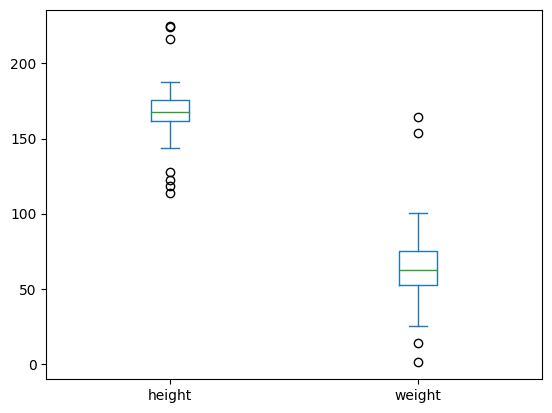

In [ ]:
# [6] 그래프 사용하여 이상치 확인
import matplotlib.pyplot as plt
Xoutlier.plot(kind = 'box')
plt.show()

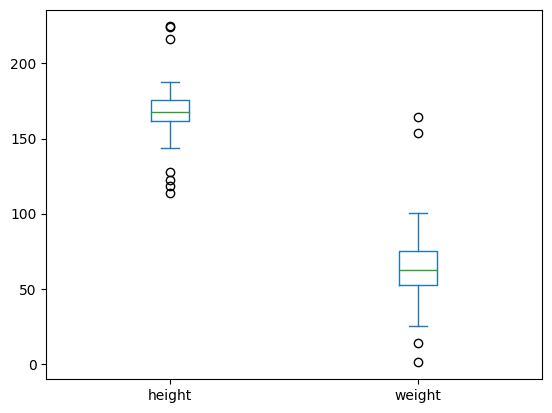

In [ ]:
# [6] 그래프 사용하여 이상치 확인
import matplotlib.pyplot as plt
Xoutlier.plot(kind='box')
plt.show()

In [ ]:
# [7] 각 feature별 Q1, Q3 확인
Xoutlier.quantile([0.25, 0.75])

,height,weight
0.25,162.00,52.75
0.75,175.85,75.00


In [ ]:
# [7] 각 feature별 Q1, Q3 확인
Xoutlier.quantile([0.25, 0.75])

,height,weight
0.25,162.00,52.75
0.75,175.85,75.00


In [ ]:
# [8] height에 대한 outlier 확인
Q1, Q3 = Xoutlier['height'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_h = round(Q1 - IQR * 1.5, 3)
upper_h = round(Q3 + IQR * 1.5, 3)
print(lower_h, upper_h)

141.225 196.625


In [ ]:
# [8] height에 대한 outlier 확인
Q1, Q3 = Xoutlier['height'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_h = round(Q1 - IQR*1.5, 3)
upper_h = round(Q3 + IQR*1.5, 3)
print(lower_h, upper_h)

141.225 196.625


In [ ]:
# [9] weight에 대한 outlier 확인
Q1, Q3 = Xoutlier['weight'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_w = round(Q1 - IQR * 1.5, 3)
upper_w = round(Q3 + IQR * 1.5, 3)
print(lower_w, upper_w)

19.375 108.375


In [ ]:
# [9] weight에 대한 outlier 확인
Q1, Q3 = Xoutlier['weight'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_w = round(Q1 - IQR*1.5, 3)
upper_w = round(Q3 + IQR*1.5, 3)
print(lower_w, upper_w)

19.375 108.375


In [ ]:
# [10] height에 대한 outlier 제거 및 학습
height = Xoutlier['height']
outlier_h = Xoutlier[(height < lower_h) | (height > upper_h)]
# print(outlier_h)

Xoutlier_rh = Xoutlier.drop(index = outlier_h.index)
Youtlier_rh = Youtlier.drop(index = outlier_h.index)
# print(Xoutlier_rh.shape, Youtlier_rh.shape)

model3 = LinearRegression()
Model_Train(model3, Xoutlier_rh, Youtlier_rh)

0.9868 0.9935


LinearRegression()

In [ ]:
# [10] height에 대한 outlier 제거 및 학습
height = Xoutlier['height']
outlier_h = Xoutlier[(height < lower_h) | (height > upper_h)]
#print(outlier_h)
Xoutlier_rh = Xoutlier.drop(index=outlier_h.index)
Youtlier_rh = Youtlier.drop(index=outlier_h.index)
#print(Xoutlier_rh.shape, Youtlier_rh.shape)
model3 = LinearRegression()
Model_Train(model3, Xoutlier_rh, Youtlier_rh)

0.9868 0.9935


LinearRegression()

In [ ]:
# [11] weight에 대한 outlier 제거 및 학습
weight = Xoutlier['weight']
outlier_w = Xoutlier[(weight < lower_w) | (weight > upper_w)]
print(outlier_w)

Xoutlier_rw = Xoutlier.drop(index = outlier_w.index)
Youtlier_rw = Youtlier.drop(index = outlier_w.index)
print(Xoutlier_rw.shape, Youtlier_rw.shape)

model4 = LinearRegression()
Model_Train(model4, Xoutlier_rw, Youtlier_rw)

     height  weight
102   127.6     0.9
104   216.3   154.0
105   224.6   164.1
106   224.5    14.0
22222222222222222222222
(103, 2) (103, 1)
0.9731 0.9217


LinearRegression()

In [ ]:
# [11] weight에 대한 outlier 제거 및 학습
weight = Xoutlier['weight']
outlier_w = Xoutlier[(weight < lower_w) | (weight > upper_w)]
print(outlier_w)
Xoutlier_rw = Xoutlier.drop(index=outlier_w.index)
Youtlier_rw = Youtlier.drop(index=outlier_w.index)
print(Xoutlier_rw.shape, Youtlier_rw.shape)
model4 = LinearRegression()
Model_Train(model4, Xoutlier_rw, Youtlier_rw)

     height  weight
102   127.6     0.9
104   216.3   154.0
105   224.6   164.1
106   224.5    14.0
(103, 2) (103,)
0.9731 0.9217


LinearRegression()

### 2-4.Polynomial Regression
- 다항 회귀
- 비선형 데이터 집합을 모델링 할 때 사용
- 곡선의 다항식 선을 사용함
- 과대적합이 나타나기 쉬움
- $y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \beta_{3} x_{1}^{2} + \beta_{4} x_{2}^{2} ...+ \epsilon$
- X를 다항식으로 변경하여 모델링의 데이터로 사용함

In [ ]:
# sklearn.preprocessing.PolynomialFeatures(degree=2, *,
#               interaction_only=False, include_bias=True, order='C')

In [ ]:
# [12] PolynomialFeatures 사용하여 2차항이 포함되도록
# Xnormal을 변환 함 (PolynomialFeatures에 poly2, 변환 결과에 Xpoly2 이름 부여)
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree = 2, include_bias=False) # interaction_only=False)
#                                      상수항 제외           제곱항 제외
# degree 생략하면 무조건 2로 설정
Xpoly2 = poly2.fit_transform(Xnormal)

model = LinearRegression()
Model_Train(model, Xpoly2, Ynormal)

1.0000 0.9988


LinearRegression()

In [ ]:
# [12] PolynomialFeatures 사용하여 2차항이 포함되도록
# Xnormal을 변환 함 (PolynomialFeatures에 poly2, 변환 결과에 Xpoly2 이름 부여)
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2, include_bias=False) #, interaction_only=True)
Xpoly2 = poly2.fit_transform(Xnormal)
model = LinearRegression()
Model_Train(model, Xpoly2, Ynormal)

1.0000 0.9988


LinearRegression()

In [ ]:
# [13] Xpoly2의 shape 확인
print(Xnormal.shape, Xpoly2.shape)

(100, 2) (100, 5)


In [ ]:
# [13] Xpoly2의 shape 확인
print(Xnormal.shape, Xpoly2.shape)

(100, 2) (100, 5)


In [ ]:
# [14] poly2의 feature_names 확인
poly2.get_feature_names_out()

array(['height', 'weight', 'height^2', 'height weight', 'weight^2'],
      dtype=object)

In [ ]:
# [14] poly2의 feature_names 확인
poly2.get_feature_names_out()

array(['height', 'weight', 'height^2', 'height weight', 'weight^2'],
      dtype=object)

In [ ]:
# [15] Xpoly2의 상관계수 확인
pd.DataFrame(Xpoly2).corr()
# Xpoly2가 df가 아니기 때문에 df로 변환

,0,1,2,3,4
0,1.000000,0.604015,0.999526,0.715850,0.602221
1,0.604015,1.000000,0.605356,0.987694,0.992038
2,0.999526,0.605356,1.000000,0.717912,0.605105
3,0.715850,0.987694,0.717912,1.000000,0.984456
4,0.602221,0.992038,0.605105,0.984456,1.000000


In [ ]:
# [15] Xpoly2의 상관계수 확인
pd.DataFrame(Xpoly2).corr()

,0,1,2,3,4
0,1.000000,0.604015,0.999526,0.715850,0.602221
1,0.604015,1.000000,0.605356,0.987694,0.992038
2,0.999526,0.605356,1.000000,0.717912,0.605105
3,0.715850,0.987694,0.717912,1.000000,0.984456
4,0.602221,0.992038,0.605105,0.984456,1.000000


In [ ]:
Xpoly2[:5]

array([[  163.1 ,    71.3 , 26601.61, 11629.03,  5083.69],
       [  175.1 ,    85.5 , 30660.01, 14971.05,  7310.25],
       [  174.  ,    78.  , 30276.  , 13572.  ,  6084.  ],
       [  171.2 ,    73.1 , 29309.44, 12514.72,  5343.61],
       [  160.2 ,    57.4 , 25664.04,  9195.48,  3294.76]])

In [ ]:
Xpoly2[:5]

array([[  163.1 ,    71.3 , 26601.61, 11629.03,  5083.69],
       [  175.1 ,    85.5 , 30660.01, 14971.05,  7310.25],
       [  174.  ,    78.  , 30276.  , 13572.  ,  6084.  ],
       [  171.2 ,    73.1 , 29309.44, 12514.72,  5343.61],
       [  160.2 ,    57.4 , 25664.04,  9195.48,  3294.76]])

In [ ]:
# [16] PolynomialFeatures 사용하여 3차항이 포함되도록
# Xnormal을 변환 함 (PolynomialFeatures에 poly3, 변환 결과에 Xpoly3 이름 부여)
poly3 = PolynomialFeatures(degree = 3, include_bias=False) #, interaction_only=True)
#                                      상수항 제외           제곱항 제외
# degree 생략하면 무조건 2로 설정
Xpoly3 = poly3.fit_transform(Xnormal)
model = LinearRegression()
Model_Train(model, Xpoly3, Ynormal)

1.0000 1.0000


LinearRegression()

In [ ]:
# [16] PolynomialFeatures 사용하여 3차항이 포함되도록
# Xnormal을 변환 함 (PolynomialFeatures에 poly3, 변환 결과에 Xpoly3 이름 부여)
poly3 = PolynomialFeatures(degree=3, include_bias=False) #, interaction_only=True)
Xpoly3 = poly3.fit_transform(Xnormal)
model = LinearRegression()
Model_Train(model, Xpoly3, Ynormal)

1.0000 1.0000


LinearRegression()

In [ ]:
# [17] Xpoly3의 shape 확인
Xpoly3.shape

(100, 9)

In [ ]:
# [17] Xpoly3의 shape 확인
print(Xpoly3.shape)

(100, 9)


In [ ]:
# [18] poly3의 shape 확인
poly3.get_feature_names_out()

array(['height', 'weight', 'height^2', 'height weight', 'weight^2',
       'height^3', 'height^2 weight', 'height weight^2', 'weight^3'],
      dtype=object)

In [ ]:
# [18] poly3의 shape 확인
poly3.get_feature_names_out()

array(['height', 'weight', 'height^2', 'height weight', 'weight^2',
       'height^3', 'height^2 weight', 'height weight^2', 'weight^3'],
      dtype=object)

In [ ]:
Xpoly3[:5]

array([[1.63100000e+02, 7.13000000e+01, 2.66016100e+04, 1.16290300e+04,
        5.08369000e+03, 4.33872259e+06, 1.89669479e+06, 8.29149839e+05,
        3.62467097e+05],
       [1.75100000e+02, 8.55000000e+01, 3.06600100e+04, 1.49710500e+04,
        7.31025000e+03, 5.36856775e+06, 2.62143085e+06, 1.28002477e+06,
        6.25026375e+05],
       [1.74000000e+02, 7.80000000e+01, 3.02760000e+04, 1.35720000e+04,
        6.08400000e+03, 5.26802400e+06, 2.36152800e+06, 1.05861600e+06,
        4.74552000e+05],
       [1.71200000e+02, 7.31000000e+01, 2.93094400e+04, 1.25147200e+04,
        5.34361000e+03, 5.01777613e+06, 2.14252006e+06, 9.14826032e+05,
        3.90617891e+05],
       [1.60200000e+02, 5.74000000e+01, 2.56640400e+04, 9.19548000e+03,
        3.29476000e+03, 4.11137921e+06, 1.47311590e+06, 5.27820552e+05,
        1.89119224e+05]])

In [ ]:
Xpoly3[:5]

array([[1.63100000e+02, 7.13000000e+01, 2.66016100e+04, 1.16290300e+04,
        5.08369000e+03, 4.33872259e+06, 1.89669479e+06, 8.29149839e+05,
        3.62467097e+05],
       [1.75100000e+02, 8.55000000e+01, 3.06600100e+04, 1.49710500e+04,
        7.31025000e+03, 5.36856775e+06, 2.62143085e+06, 1.28002477e+06,
        6.25026375e+05],
       [1.74000000e+02, 7.80000000e+01, 3.02760000e+04, 1.35720000e+04,
        6.08400000e+03, 5.26802400e+06, 2.36152800e+06, 1.05861600e+06,
        4.74552000e+05],
       [1.71200000e+02, 7.31000000e+01, 2.93094400e+04, 1.25147200e+04,
        5.34361000e+03, 5.01777613e+06, 2.14252006e+06, 9.14826032e+05,
        3.90617891e+05],
       [1.60200000e+02, 5.74000000e+01, 2.56640400e+04, 9.19548000e+03,
        3.29476000e+03, 4.11137921e+06, 1.47311590e+06, 5.27820552e+05,
        1.89119224e+05]])

### 2-5.Ridge Regression
- sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)
- coef(회귀계수)가 작아지지만 0이 되지는 않음

In [ ]:
# alpha=0 : 규제를 주지 않음
# alpha 값이 크다는 것은 규제를 크게 주겠다는 것을 의미 => coef_ 값들이 작아짐

In [ ]:
# [19] PolynomialFeatures degree=3과 Ridge를 사용한 모델링
from sklearn.linear_model import Ridge

poly3 = PolynomialFeatures(degree = 3, include_bias=False) # interaction_only=False)
#                                      상수항 제외           제곱항 제외
# degree 생략하면 무조건 2로 설정
Xpoly3 = poly3.fit_transform(Xnormal)
ridge_coef = pd.DataFrame()

for a in [0, 0.001, 0.1, 1, 10] :
  print(f'alpha = {a:7.4f}', end = ' ')
  model = Ridge(alpha = a, random_state = 0)
  Model_Train(model, Xpoly3, Ynormal, scale = True)
  ridge_coef[f'alpha_{a}'] = model.coef_

alpha =  0.0000 1.0000 1.0000


ValueError: ignored

In [ ]:
# [19] PolynomialFeatures degree=3과 Ridge를 사용한 모델링
# 권장 순서
# X -> Xscaled -> Xpoly -> fit()

from sklearn.linear_model import Ridge
Xscaled = MinMaxScaler().fit_transform(Xnormal)
poly3 = PolynomialFeatures(degree=3, include_bias=False) #, interaction_only=True)
Xpoly3 = poly3.fit_transform(Xscaled)
ridge_coef = pd.DataFrame()
for a in [0, 0.001, 0.1, 1, 10]:
    print(f'alpha={a:7.4f}', end='  ')
    model = Ridge(alpha=a, random_state=0)
    Model_Train(model, Xpoly3, Ynormal)
    ridge_coef[f'alpha_{a}'] = model.coef_

alpha= 0.0000  1.0000 1.0000
alpha= 0.0010  0.9999 0.9977
alpha= 0.1000  0.9890 0.9754
alpha= 1.0000  0.9108 0.9137
alpha=10.0000  0.5942 0.5457


In [ ]:
'''
성능비교
alpha= 0.0000  1.0000 1.0000
alpha= 0.0010  0.9999 0.9978
alpha= 0.1000  0.9890 0.9755
alpha= 1.0000  0.9107 0.9133
alpha=10.0000  0.5968 0.5496
'''

In [ ]:
# [20] ridge_coef 출력하여 회귀계수 확인
ridge_coef

,alpha_0,alpha_0.001,alpha_0.1,alpha_1,alpha_10
0,-11.362153,-10.577845,-6.775021,-3.273453,-0.579522
1,30.806355,26.825901,17.385751,8.800228,2.781931
2,5.503521,-1.570428,-3.582463,-3.302849,-0.573838
3,-16.133851,-5.109459,2.639689,2.604697,1.391179
4,0.026863,1.232404,5.995482,5.056835,2.340779
5,-1.630751,4.796710,-0.777098,-2.897834,-0.481850
6,4.225833,-2.969766,-1.302126,0.079072,0.718215
7,-0.113384,-2.210462,-2.022261,1.200538,1.372022
8,0.030032,0.234020,-1.739847,1.888091,1.760240


In [ ]:
ridge_coef.abs().sum()

alpha_0        70.699040
alpha_0.001    56.028496
alpha_0.1      42.135684
alpha_1        29.150103
alpha_10       11.945173
dtype: float64

### 2-6.Lasso Regression
- sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
- 규제강도가 커지면 회귀계수가 작아지고 0도 될 수 있다

In [ ]:
# 비권장 순서
# X데이터를 갖고 -> 이 X데이터를 활용해 Xpoly제작 -> 스케일링 Xscaled -> 학습 fit()
# BUT 권장하지 않는 순서임

tX = pd.DataFrame({'A':[1, 10, 100, 1000, 10000, 100000]})
t4 = tX ** 4
t4['A']

0                      1
1                  10000
2              100000000
3          1000000000000
4      10000000000000000
5    7766279631452241920
Name: A, dtype: int64

In [ ]:
# 권장 순서
# X데이터를 갖고 -> 스케일링 Xscaled -> 이 X데이터를 활용해 Xpoly제작 -> 학습 fit(
tX = pd.DataFrame({'A':[1, 10, 100, 1000, 10000, 100000]})
tS = MinMaxScaler().fit_transform(tX) # 스케일링, ndarray
t4 = tS ** 4 # 4차식 생성
t4

array([[0.00000000e+00],
       [6.56126245e-17],
       [9.60634435e-13],
       [9.96045837e-09],
       [9.99640045e-05],
       [1.00000000e+00]])

In [ ]:
# int64
-2 ** 63, +2 ** 63 - 1

(-9223372036854775808, 9223372036854775807)

In [ ]:
A = 1e20
type(A)

float

In [ ]:
# [21] degree=3과 Lasso를 사용한 모델링
from sklearn.linear_model import Lasso
Xscaled = MinMaxScaler().fit_transform(Xnormal)
poly3 = PolynomialFeatures(degree=3, include_bias=False) #, interaction_only=True)
Xpoly3 = poly3.fit_transform(Xscaled)
lasso_coef = pd.DataFrame()
for a in [0.0001, 0.001, 0.1, 0.2, 0.3]:
    print(f'alpha={a:7.4f}', end='  ')
    model = Lasso(alpha=a, max_iter = 1000, tol = 0.001, random_state=0)
    Model_Train(model, Xpoly3, Ynormal)
    lasso_coef[f'alpha_{a}'] = model.coef_

alpha= 0.0001  0.9998 0.9985
alpha= 0.0010  0.9994 0.9986
alpha= 0.1000  0.9253 0.9262
alpha= 0.2000  0.7656 0.6763
alpha= 0.3000  0.7096 0.6361


In [ ]:
'''
alpha= 0.0001  0.9998 0.9985
alpha= 0.0010  0.9994 0.9986
alpha= 0.1000  0.9253 0.9262
alpha= 0.2000  0.7656 0.6763
alpha= 0.3000  0.7096 0.6361
'''

In [ ]:
# [22] lasso_coef 출력하여 회귀계수 확인
lasso_coef

,alpha_0.0001,alpha_0.001,alpha_0.1,alpha_0.2,alpha_0.3
0,-8.616092,-7.921513,-0.000000,-0.000000,-0.000000
1,25.845264,25.901747,17.306090,12.632765,10.690377
2,-6.287965,-6.103587,-4.921906,-0.000000,-0.000000
3,-1.962306,-2.489798,0.000000,0.000000,0.000000
4,1.290251,0.369116,0.000000,0.000000,0.000000
5,7.971993,6.181131,-0.000000,-0.000000,-0.000000
6,-5.698380,-3.557982,-0.000000,-0.000000,0.000000
7,-1.608764,-1.467093,0.000000,0.000000,0.000000
8,-0.174546,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Ridge, Lasso는 overfitting 되는 데이터에 주로 사용하여 overfitting을 해결하는 용도로 사용한다

### 2-7.DecisionTree
- sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0

In [ ]:
# [22] Xnormal, Ynormal 데이터에 DecisionTreeRegressor 사용
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth = 8, random_state = 0)
Model_Train(model, Xnormal, Ynormal)

0.9999 0.7974


DecisionTreeRegressor(max_depth=8, random_state=0)

In [ ]:
# train  test
# 1.0000 0.7371  => overfitting, 과대적합
# 이유 : train은 다 맞췄는데 Test는 정확도가 낮음
# 과대적합 해결방법 => Ridge, Lasso, 앙상블
#                      데이터의 크기를 늘리는 것, 함수의 parameter에 값을 변경

In [ ]:
# [23] 데이터의 개수를 2000개로 늘려 DecisionTreeRegressor 사용
dataL = make_sample(1234, 2000)
Xlarge = dataL[['height', 'weight']]
Ylarge = dataL['BMI']

model = DecisionTreeRegressor(random_state = 0)
Model_Train(model, Xnormal, Ynormal)

1.0000 0.7371


DecisionTreeRegressor(random_state=0)

### 2-8.앙상블

- sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
- https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [ ]:
# [24] Xnormal, Ynormal 데이터에 RandomForestRegressor 사용
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(200, random_state = 0)
Model_Train(model, Xnormal, Ynormal) # 100개

0.9900 0.8209


RandomForestRegressor(n_estimators=200, random_state=0)

In [ ]:
# [25] Xnormal을 2차식으로 만든 후 RandomForestRegressor 사용
poly2 = PolynomialFeatures(degree=2, include_bias=False) #, interaction_only=True)
Xpoly2 = poly2.fit_transform(Xnormal)
model = RandomForestRegressor(random_state = 0)
Model_Train(model, Xnormal, Ynormal) # 100개
# Xnormal과 Xpoly2 모두 성능이 좋지 않음

0.9897 0.8219


RandomForestRegressor(random_state=0)

In [ ]:
# [26] 데이터의 개수를 2000개로 늘려 RandomForestRegressor 사용
dataL = make_sample(1234, 2000)
Xlarge = dataL[['height', 'weight']]
Ylarge = dataL['BMI']

model = RandomForestRegressor(random_state = 0)
Model_Train(model, Xlarge, Ylarge) # 2000개

0.9994 0.9967


RandomForestRegressor(random_state=0)

- XBGRegressor : max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective="reg:linear", booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, importance_type="gain", **kwargs)

In [ ]:
# [27] Xnormal, Ynormal 데이터에 XGBRegressor 사용
from xgboost import XGBRegressor
model = RandomForestRegressor(random_state = 0)
Model_Train(model, Xnormal, Ynormal) # 100개

0.9897 0.8219


RandomForestRegressor(random_state=0)

In [ ]:
# [28] 데이터의 개수를 2000개로 늘려 XGBRegressor 사용
dataL = make_sample(1234, 2000)
Xlarge = dataL[['height', 'weight']]
Ylarge = dataL['BMI']

model = XGBRegressor(n_estimators = 900, random_state = 0)
Model_Train(model, Xlarge, Ylarge) # 2000개

1.0000 0.9967


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

## 3.회귀 모델 성능평가

- $R^2$ score
  - model.score(X, y)
  - sklearn.metrics.r2_score(y_true, y_pred)
  - 분산 기반으로 예측 성능을 평가
  - 예측값 분산 / 실제값 분산
- MAE(Mean Absolute Error)
   - sklearn.metrics.mean_absolute_error(y_true, y_pred)
   - 실제 값과 예측 값의 차이를 절댓값으로 변환해 평균한 것
- MSE(Mean Squared Error)
   - sklearn.metrics.mean_squared_error(y_true, y_pred)
   - 실제 값과 예측 값의 차이를 제곱해 평균한 것
- RMSE(Root Mean Squared Error)
   - sklearn API에 없음
   - MSE에 np.sqrt() 또는 ** 0.5를 사용함
   - MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 것
- MSLE(Mean Squared Log Error)
   - sklearn.metrics.mean_squared_log_error(y_true, y_pred)
   - MSE에 로그를 적용해준 지표
- RMSLE(Root Mean Square Logarithmic Error)
   - RMSE에 로그를 적용해준 지표
   - 이상치가 있더라도 변동폭이 크지 않음(이상치에 강건함)
   - 실제값보다 예측값이 작을 때 더 큰 패널티 부여
   - 작게 예측하면 안되는 경우 사용하면 좋음 (배달 시간 예측)
   - 실제값, 예측값에 음수가 있으면 안됨 (오류 발생)
- 참조 : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-17-%ED%9A%8C%EA%B7%80-%ED%8F%89%EA%B0%80-%EC%A7%80%ED%91%9C

### 3-1.성능평가 함수

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

# [29] r2_score, mae, mse, rmse, msle, rmsle 를 구해 반환하는 함수를 작성합니다.
# 한 개의 행에 6가지 성능평가 결과를 소수점 아래 4자리까지 표시되도록 하여 작성합니다.
def get_scores(model, X, Y):
    pred = model.predict(X)

    # 음수가 있어도 상관없음
    A = r2_score(Y, pred)
    B = mae(Y, pred)
    C = mse(Y, pred)
    E = np.sqrt(C) # rmse

    # msle와 rmsle는 음수가 있으면 안됨
    # pred[0] = -2
    pred = np.where(pred < 0, 0, pred)
    # print(pred[0])
    D = msle(Y, pred)
    F = np.sqrt(D) # rmsle
    return f'r2:{A:.4} mae:{B:.4} mse:{C:.4} msle:{D:.4} rmse:{E:.4} rmsle:{F:.4}'

### 3-2.모델링 함수

In [ ]:
# [30] Model_Train함수를 수정해서
# train, test에 대한 6가지 성능평가 결과를 출력하는 Model_Train2 함수를 작성합니다.
def Model_Train_2(model, XF, YF, scale=False):
    # 7:3 분리, random_state=321  (주의: stratify사용 안함 -> 분류 모델에서만 사용)
    if scale:
        XF = MinMaxScaler().fit_transform(XF)
    xtrain, xtest, ytrain, ytest = train_test_split(XF, YF,
                                                    test_size=0.3,
                                                    random_state=321)
    model.fit(xtrain, ytrain)
    #  코드 추가 부분
    print('train :', get_scores(model, xtrain, ytrain))
    print('test :', get_scores(model, xtest, ytest))

    return model

### 3-3.여러 모델 적용

In [ ]:
# [31] Xnormal, Ynormal 데이터 사용, LinearRegression => model1
model1 = LinearRegression()
Model_Train_2(model1, Xnormal, Ynormal)

train : r2:0.9931 mae:0.2648 mse:0.12 msle:0.0002734 rmse:0.3464 rmsle:0.01653
test : r2:0.9625 mae:0.3783 mse:0.3626 msle:0.0009766 rmse:0.6022 rmsle:0.03125


LinearRegression()

In [ ]:
'''
음수값을 임의로 0으로 수정한 경우 : rmse, rmsle의 값이 커짐
train : r2:0.9931 mae:0.2648 mse:0.12 msle:0.1763 rmse:0.3464 rmsle:0.4199
test : r2:0.9625 mae:0.3783 mse:0.3626 msle:0.3443 rmse:0.6022 rmsle:0.5868
=> 음수가 있으면 오류값들이 커짐
'''


In [ ]:
# [32] Xpoly3, Ynormal 데이터 사용, LinearRegression => model2
poly3 = PolynomialFeatures(degree=3, include_bias=False) #, interaction_only=True)
Xpoly3 = poly3.fit_transform(Xnormal)
model2 = LinearRegression()
Model_Train_2(model2, Xpoly3, Ynormal)
print(Xpoly3.shape)

train : r2:1.0 mae:0.002813 mse:1.09e-05 msle:1.991e-08 rmse:0.003302 rmsle:0.0001411
test : r2:1.0 mae:0.006752 mse:0.0004418 msle:1.257e-06 rmse:0.02102 rmsle:0.001121
(100, 9)


In [ ]:
# [33] Xlarge, Ylarge 데이터 사용, XGBRegressor => model3
dataL = make_sample(1234, 2000)
Xlarge = dataL[['height', 'weight']]
Ylarge = dataL['BMI']

model3 = XGBRegressor(n_estimators = 900, random_state = 0)
Model_Train_2(model3, Xlarge, Ylarge) # 2000개

train : r2:1.0 mae:0.003165 mse:1.961e-05 msle:3.505e-08 rmse:0.004428 rmsle:0.0001872
test : r2:0.9967 mae:0.1408 mse:0.04675 msle:9.131e-05 rmse:0.2162 rmsle:0.009556


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=900, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [ ]:
# [34] X_submission, Y_hidden 데이터를 사용하여 model1, model2, model3의 성능을 평가하여봄
# (실제는 할 수 없음)
XF = X_submission[['height', 'weight']]
YF = Y_hidden['BMI']
# XFpoly3 = poly3,fit_transform(XF)
XFpoly3 = poly3.fit_transform(XF)

print(get_scores(model1, XF, YF))
print(get_scores(model2, XFpoly3, YF))
print(get_scores(model3, XF, YF))

r2:0.9892 mae:0.2701 mse:0.1499 msle:0.0003649 rmse:0.3871 rmsle:0.0191
r2:1.0 mae:0.003643 mse:2.242e-05 msle:4.639e-08 rmse:0.004735 rmsle:0.0002154
r2:0.9962 mae:0.1337 mse:0.05326 msle:0.0001008 rmse:0.2308 rmsle:0.01004


In [ ]:
# [35] 제출파일 만들기 (실제 문제에서 요구하는 형태로 작성해야 함)
pred = model2.predict(XFpoly3)
submission = pd.DataFrame({'ID':X_submission['ID'],
                           'BMI':pred})
# submission.head()
submission.to_csv('수험번호.csv', index = False)

## 4.웹사이트 방문자 예측

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

fatal: destination path 'bigdata' already exists and is not an empty directory.


### 4-1. 데이터 이해, 생성
- 1개 데이터를 나누어 시험용으로 변경해 보는 작업
- 실제 시험에서는 이런 과정은 필요 없음


In [ ]:
# https://www.kaggle.com/bobnau/daily-website-visitors
# Daily number of pages loaded
# Daily number of visitors from whose IP addresses there haven't been hits on any page in over 6 hours
# Number of unique visitors who do not have a cookie identifying them as a previous customer
# Number of unique visitors minus first time visitors

In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd

# 데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
# 시험환경에서는 아래와 같이 해야해서 수정했습니다 ^^*
pd.options.display.max_rows = 500     #출력할 max row를 지정
pd.options.display.max_columns = 20   #출력할 max columns를 지정
#출력 format 지정 - 소수점아래 4자리까지
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# [1] 'bigdata/daily-website-visitors.csv' 파일 불러오기, shape 확인하기
df = pd.read_csv('bigdata/daily-website-visitors.csv')
df.shape

(2167, 8)

In [ ]:
# [2] head를 사용해 데이터의 모습 확인
# 컬럼명이 대소문자 섞여 있어 사용하기 좋지 않음
print(df.head(2))

   Row     Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1  Sunday            1  9/14/2014      2,146         1,582   
1    2  Monday            2  9/15/2014      3,621         2,528   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  


In [ ]:
# [3] 컬럼명 정리 - 소문자로 변경, '.'을 '-'로 변경
df.columns = df.columns.str.replace('.', '_', regex = True).str.lower()
df.columns
# regex를 True로 하면 그 문자열 하나하나를 찾아서 replace를 동작시키니까 regex를 False가 아니라 True 로 해야합니다
# .str.replace() 에서는 없어도 됩니당   그런데 Series.replace()에서는 필요하고요.  regex 라는 옵션의 기본값이 .str.replace()에서는 True, Series.replace()에서는 False 이기 때문이고,  그것이 있어야  정규식으로 이해가 됩니다.

Index(['row', 'day', 'day_of_week', 'date', 'page_loads', 'unique_visits',
       'first_time_visits', 'returning_visits'],
      dtype='object')

컬럼 정보
- row : 1번 부터 시작하는 일련번호
- day : 요일 정보
- day_of_week : 요일 정보
- date : 날짜 정보
- page_loads : 로드된 일별 페이지 수
- unique_visits : 6시간 이상 페이지에서 조회되지 않은 IP 주소의 일일 방문자 수
- first_time_visits : 이전 고객으로 식별되는 쿠키를 가지고 있지 않은 고유 방문자 수
- returning_visits : unique_visits 수에서 first_time_visits 제외

In [ ]:
df.dtypes

row                   int64
day                  object
day_of_week           int64
date                 object
page_loads           object
unique_visits        object
first_time_visits    object
returning_visits     object
dtype: object

In [ ]:
# [4] unique_visits를 예측하는 값으로 사용할 것이며, 수치데이터 이어야 함
# 콤마 제거 후, int로 형변환
df['unique_visits'] = df['unique_visits'].replace(',', '', regex = True).astype(int)
# df['unique_visits'].replace(',', '', regex=True).astype(int)

In [ ]:
# [5] 시험 형식으로 train, test 데이터로 나누어 저장합니다.  (6:4 비율)
train_size = len(df) - int(len(df) * 0.4)
# train data 0.6       test data

# 여러 가지 데이터가 고루 섞이도록 해야 함
df = df.sample(frac = 1, random_state = 1234)
df['row'] = range(1, len(df) + 1) # row가 섞였기 때문에 다시 번호를 지정하기 위함임
train = df.iloc[:train_size, :]
test = df.iloc[train_size:, :]
print(train.shape, test.shape)

y = 'unique_visits'
X_train = train.drop(columns = y)
Y_train = train[['row', y]]

X_test = test.drop(columns = y)
Y_test = test[['row', y]]

X_train.to_csv('x_train.csv', index = False)
Y_train.to_csv('y_train.csv', index = False)
X_test.to_csv('x_test.csv', index = False)
Y_test.to_csv('y_test.csv', index = False)

(1301, 8) (866, 8)


In [ ]:
# [5] 시험 형식으로 train, test 데이터로 나누어 저장합니다.  (6:4 비율)
train_size = len(df) - int(len(df)*0.4)

# 여러 가지 데이터가 고루 섞이도록 해야 함
df = df.sample(frac=1, random_state=1234)
df['row'] = range(1, len(df) + 1)
train = df.iloc[:train_size, :]
test = df.iloc[train_size:, :]
print(train.shape, test.shape)
y = 'unique_visits'
X_train = train.drop(columns=y)
Y_train = train[['row', y]]
X_test = test.drop(columns=y)
Y_test = test[['row', y]]
X_train.to_csv('x_train.csv', index=False)
Y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)
Y_test.to_csv('y_test.csv', index=False)

(1301, 8) (866, 8)


### 4-2. 데이터 불러오기, 전처리

In [ ]:
# [1] 데이터 파일 불러오기
import pandas as pd

pd.options.display.max_rows = 500
pd.options.display.max_columns = 20

pd.set_option('display.float_format', '{:.4f}'.format)

X_use        = pd.read_csv('x_train.csv') # 학습에 필요한 데이터
X_submission = pd.read_csv('x_test.csv') # 제출용 데이터
Y            = pd.read_csv('y_train.csv') # 학습에 사용할 Y값
Y_hidden     = pd.read_csv('y_test.csv')

In [ ]:
# [2] dfX 만들기, dfX의 info() 확인
# use, submission 데이터를 묶어 전처리 하기 위함
dfX = pd.concat([X_use, X_submission], ignore_index = True, axis = 0) # use가 위에, submission이 아래쪽으로 가도록
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   row                2167 non-null   int64 
 1   day                2167 non-null   object
 2   day_of_week        2167 non-null   int64 
 3   date               2167 non-null   object
 4   page_loads         2167 non-null   object
 5   first_time_visits  2167 non-null   object
 6   returning_visits   2167 non-null   object
dtypes: int64(2), object(5)
memory usage: 118.6+ KB


In [ ]:
# [3] dfX의 object 값이 어떤 것인지 확인하기 위해 5줄 출력을 합니다.
dfX.head()

,row,day,day_of_week,date,page_loads,first_time_visits,returning_visits
0,1,Sunday,1,4/10/2016,"4,071","2,330",534
1,2,Thursday,5,1/18/2018,"4,124","2,157",520
2,3,Saturday,7,9/1/2018,"1,731",989,252
3,4,Wednesday,4,4/20/2016,"6,581","3,926",898
4,5,Tuesday,3,1/27/2015,"4,172","2,592",411


In [ ]:
# [4] 'page_loads', 'first_time_visits', 'returning_visits' 에 대해서
#  콤마를 없애고, int로 형변환 합니다
# dfX['page_loads'].str.replace(',', '', regex=True).astype(int)
# 여러 컬럼을 바꿔야 하기 때문에 목록으로 작성

names = ['page_loads', 'first_time_visits', 'returning_visits']
dfX[names] = dfX[names].replace(',', '', regex=True).astype(int)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   row                2167 non-null   int64 
 1   day                2167 non-null   object
 2   day_of_week        2167 non-null   int64 
 3   date               2167 non-null   object
 4   page_loads         2167 non-null   int64 
 5   first_time_visits  2167 non-null   int64 
 6   returning_visits   2167 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 118.6+ KB


In [ ]:
# [5] 'date'에 대해서 datetime64로 형변환 합니다.
#dfX['date'] = dfX['date'].astype('datetime64')
dfX['date'] = pd.to_datetime(dfX['date'], format = '%m/%d/%Y')
# dfX['date'] = pd.to_datetime(dfX['date'], format='%m/%d/%Y')

In [ ]:
# [6] 형변환이 올바르게 되었는지 확인합니다.
dfX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   row                2167 non-null   int64         
 1   day                2167 non-null   object        
 2   day_of_week        2167 non-null   int64         
 3   date               2167 non-null   datetime64[ns]
 4   page_loads         2167 non-null   int64         
 5   first_time_visits  2167 non-null   int64         
 6   returning_visits   2167 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 118.6+ KB


In [ ]:
# [7] day, day_of_week를 확인해 보면 동일한 데이터 인 것을 알 수 있음
# 'day' 컬럼을 제거합니다.
dfX2 = dfX.drop(columns = 'day')

In [ ]:
# [8] 'date'에서 'year', 'month', 'day'에 대한 정보를 dfX2에 포함시키고,
# 'date' 를 제거합니다.
# 상황에 따라 'quarter' 사용도 고려할 수 있음, 주말/주중으로 나눌 수도 있음 ...
date = pd.DataFrame()
temp = dfX2['date'].dt

date['year'] = temp.year
date['month'] = temp.month
date['day'] = temp.day
dfX3 = dfX2.drop(columns = 'date')
dfX3 = pd.concat([dfX3, date], axis = 1)
dfX3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   row                2167 non-null   int64
 1   day_of_week        2167 non-null   int64
 2   page_loads         2167 non-null   int64
 3   first_time_visits  2167 non-null   int64
 4   returning_visits   2167 non-null   int64
 5   year               2167 non-null   int64
 6   month              2167 non-null   int64
 7   day                2167 non-null   int64
dtypes: int64(8)
memory usage: 135.6 KB


In [ ]:
# [9] dfX3과 Y를 merge 합니다.
# Y와 X의 feature의 관계를 분석해 보기 위해!
dfXY = pd.merge(dfX3, Y)
print(dfXY.shape, dfX3.shape, Y.shape)

(1301, 9) (2167, 8) (1301, 2)


In [ ]:
# [10] dfXY의 상관계수를 확인한다
# 'unique_visits'와 상관이 매우 높은 feature들이 있음 (page_loads, first_time_visits, returning_visits)
print(dfXY.corr()['unique_visits'])

row                  0.0156
day_of_week         -0.2152
page_loads           0.9890
first_time_visits    0.9961
returning_visits     0.8998
year                 0.0728
month               -0.0471
day                 -0.0660
unique_visits        1.0000
Name: unique_visits, dtype: float64


In [ ]:
# [11] 'day_of_week' 별 'unique_visits'의 평균을 구해본다.
# 2, 3, 4, 5 가 높고 1, 6, 7이 낮은 것을 볼 수 있다.
temp = dfXY.groupby('day_of_week')['unique_visits'].mean()
temp

day_of_week
1   2302.8558
2   3407.2749
3   3456.1692
4   3462.7006
5   3282.0223
6   2642.7368
7   1779.5138
Name: unique_visits, dtype: float64

In [ ]:
# [12] 'day_of_week' 별 평균이 높은 것에 대한 데이터를 high_day_of_week로 저장
high_day_of_week = temp[temp > 3000].index.values # 꼭 3000일 필요는 없고 위의 값들을 포함하면 됨
high_day_of_week

array([2, 3, 4, 5])

In [ ]:
# [13] 'month' 별 'unique_visits'의 평균을 구해본다.
# 2, 3, 4, 5, 10, 11이 높고 1, 6, 7이 낮은 것을 볼 수 있다.
temp = dfXY.groupby('month')['unique_visits'].mean()
temp

month
1    2483.2035
2    3311.6500
3    3246.1759
4    3509.1584
5    3259.7745
6    2578.6465
7    2200.7541
8    2259.1327
9    2669.2000
10   3203.8211
11   3366.4522
12   2699.1913
Name: unique_visits, dtype: float64

In [ ]:
# [14] 'month' 별 평균이 높은 것에 대한 데이터를 high_day_of_week로 저장
high_month = temp[temp > 3000].index.values
high_month

array([ 2,  3,  4,  5, 10, 11])

In [ ]:
dfX3['day_of_week'].isin(high_day_of_week)

0       False
1        True
2       False
3        True
4        True
        ...  
2162    False
2163     True
2164    False
2165     True
2166    False
Name: day_of_week, Length: 2167, dtype: bool

In [ ]:
# [15] high_day_of_week, high_month의 index 정보를 사용해 파생 변수 생성
# dfX3에 높은 평균을 갖는 요일과 달을 1, 아닌 것을 0으로 하는 dow_h, month_h 변수 추가
import numpy as np
# 방법 1
#dfX3['dow_h'] = np.where(dfX3['day_of_week'].isin(high_day_of_week), 1, 0)
# 0 : 높지 않은 것, 1 : 높은 것

# 방법 2
dfX3['dow_h'] = dfX3['day_of_week'].isin(high_day_of_week).astype(int)
dfX3['month_h'] = dfX3['month'].isin(high_month).astype(int)
dfX3.head(3)

,row,day_of_week,page_loads,first_time_visits,returning_visits,year,month,day,dow_h,month_h
0,1,1,4071,2330,534,2016,4,10,0,1
1,2,5,4124,2157,520,2018,1,18,1,0
2,3,7,1731,989,252,2018,9,1,0,0


### 4-3.성능평가, 모델링 함수


In [ ]:
#[16] 사용할 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

# [17] r2_train, r2_test, mae, mse, rmse, msle, rmsle 를 구해
#      Series로 반환하는 함수를 작성합니다.
def get_scores2(model, xtrain, xtest, ytrain, ytest):
    pred1 = model.predict(xtrain) # train
    pred2 = model.predict(xtest) # test

    # 음수가 있어도 상관없음
    # pred가 두 개이기 때문에 A B C ...도 두 개씩
    A1 = r2_score(ytrain, pred1)
    A2 = r2_score(ytest, pred2)
    B = mae(ytest, pred2)
    C = mse(ytest, pred2)
    E = np.sqrt(C) # rmse

    # msle와 rmsle는 음수가 있으면 안됨
    # pred[0] = -2
    pred2 = np.where(pred2 < 0, 0, pred2)
    # print(pred[0])
    D = msle(ytest, pred2)
    F = np.sqrt(D) # rmsle

    data = [ round(x, 4) for x in [A1, A2, B, C, D, E, F]]
    names = 'r2_train r2_test mae mse msle rmse rmsle'.split()
    scores = pd.Series(data, index = names)
    return  scores

In [ ]:
# [18] 다양한 모델을 만들고 성능을 출력하는 함수 작성
# 결과를 DataFrame으로 만듭니다
def make_models(xtrain, xtest, ytrain, ytest, n=300, RL=False):
    temp = pd.DataFrame()

    model1 = LinearRegression().fit(xtrain, ytrain) # 학습 진행
    temp['model1'] = get_scores2(model1, xtrain, xtest, ytrain, ytest)

    model2 = DecisionTreeRegressor(random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
    temp['model2'] = get_scores2(model2, xtrain, xtest, ytrain, ytest)

    if not RL :
      for d in range(3, 9) :
        model2 = DecisionTreeRegressor(max_depth = d, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp[f'model2_{d}'] = get_scores2(model2, xtrain, xtest, ytrain, ytest)

      model3 = RandomForestRegressor(n, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
      temp['model3'] = get_scores2(model3, xtrain, xtest, ytrain, ytest)

      for d in range(3, 9) :
        model3 = RandomForestRegressor(n, max_depth = d, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp[f'model3{d}'] = get_scores2(model3, xtrain, xtest, ytrain, ytest)

      model4 = XGBRegressor(objective = 'reg:squarederror').fit(xtrain, ytrain) # overfitting 나기 쉬움
      temp['model4'] = get_scores2(model4, xtrain, xtest, ytrain, ytest)

    if RL :
      for a in [0.0001, 0.001, 0.01, 0.1, 1, 2] :
        model5 = Ridge(alpha = a).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp[f'model5_{a}'] = get_scores2(model5, xtrain, xtest, ytrain, ytest)

      for a in [0.0001, 0.001, 0.01, 0.1, 1, 2] :
        model6 = Lasso(alpha = a).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp['model6'] = get_scores2(model6, xtrain, xtest, ytrain, ytest)

    temp = temp.T
    temp.insert(2, 'diff', (temp['r2_train'] - temp['r2_test']).abs())

    return temp

SyntaxError: ignored

### 4-4.데이터 분리, 모델적용

In [ ]:
dfX3.columns

Index(['row', 'day_of_week', 'page_loads', 'first_time_visits',
       'returning_visits', 'year', 'month', 'day', 'dow_h', 'month_h'],
      dtype='object')

In [ ]:
# [19] 학습에 사용할 feature 선택,
# dfX4로 저장
# 'page_loads','first_time_visits' => 이것을 사용하면 성능이 무지 좋아요. (높은 상관계수)
from sklearn.preprocessing import MinMaxScaler
Xfeatures = ['day_of_week', 'returning_visits', 'year', 'month', 'day', 'dow_h', 'month_h']
dfX4 = dfX3[Xfeatures]

# 스케일링
dfX4 = MinMaxScaler().fit_transform(dfX4) # dfX4는 ndarray 객체
print(dfX4.shape, type(dfX4))

(2167, 7) <class 'numpy.ndarray'>


In [ ]:
# [20] dfX4 데이터를 X_use, X_submission 으로 다시 분리
# dfX4 분리에서는 X_use의 행의 개수 사용
# YF, Y_submissionF 생성 | Y에서 'unique_visits'만 선택

train_size = len(X_use)
XF = dfX4[:train_size, :] # 학습용, ndarray, DataFrame 모두 가능
X_submissionF =  dfX4[train_size:] # 제출용

YF = Y['unique_visits']
Y_submissionF = Y_hidden['unique_visits']
print([x.shape for x in [XF, X_submissionF, YF, Y_submissionF]])

[(1301, 7), (866, 7), (1301,), (866,)]


In [ ]:
# [21] XF, YF 데이터를 사용하여 데이터를 분리하고 make_models를 호출합니다.
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size = 0.3, random_state = 1234)
print([x.shape for x in [xtrain, xtest, ytrain, ytest]])

models = make_models(xtrain, xtest, ytrain, ytest )
print(models)

[(910, 7), (391, 7), (910,), (391,)]
          r2_train  r2_test   diff      mae         mse   msle     rmse  rmsle
model1      0.8511   0.8587 0.0076 295.0650 145752.2273 0.0202 381.7751 0.1421
model2      1.0000   0.8986 0.1014 238.7084 104541.5422 0.0159 323.3288 0.1262
model2_3    0.8120   0.7832 0.0288 367.2793 223556.6441 0.0318 472.8178 0.1784
model2_4    0.8628   0.8332 0.0296 321.6995 171980.5508 0.0256 414.7054 0.1600
model2_5    0.8981   0.8572 0.0409 298.8240 147280.4045 0.0226 383.7713 0.1503
model2_6    0.9291   0.8826 0.0465 269.6304 121077.3224 0.0187 347.9617 0.1367
model2_7    0.9503   0.8938 0.0565 249.3379 109476.3621 0.0175 330.8721 0.1323
model2_8    0.9685   0.8986 0.0699 242.6321 104544.4354 0.0165 323.3333 0.1285
model3      0.9910   0.9418 0.0492 186.0596  59998.9441 0.0084 244.9468 0.0916
model33     0.8376   0.8162 0.0214 340.0023 189573.2177 0.0265 435.4001 0.1627
model34     0.8935   0.8714 0.0221 286.7268 132599.6924 0.0188 364.1424 0.1372
model35     0.9

In [ ]:
# [22] 여러 가지 조건으로 정렬하고 평가할 수 있음
print(models.sort_values('rmsle'))
# 모델4 선택

          r2_train  r2_test   diff      mae         mse   msle     rmse  rmsle
model4      0.9996   0.9580 0.0416 154.1789  43267.1741 0.0060 208.0076 0.0777
model3      0.9910   0.9418 0.0492 186.0596  59998.9441 0.0084 244.9468 0.0916
model38     0.9773   0.9367 0.0406 196.4149  65300.2984 0.0092 255.5392 0.0961
model37     0.9662   0.9305 0.0357 206.8630  71675.3599 0.0103 267.7225 0.1014
model36     0.9508   0.9196 0.0312 225.9349  82934.6798 0.0121 287.9838 0.1098
model35     0.9286   0.9002 0.0284 253.6384 102884.3599 0.0148 320.7559 0.1215
model2      1.0000   0.8986 0.1014 238.7084 104541.5422 0.0159 323.3288 0.1262
model2_8    0.9685   0.8986 0.0699 242.6321 104544.4354 0.0165 323.3333 0.1285
model2_7    0.9503   0.8938 0.0565 249.3379 109476.3621 0.0175 330.8721 0.1323
model2_6    0.9291   0.8826 0.0465 269.6304 121077.3224 0.0187 347.9617 0.1367
model34     0.8935   0.8714 0.0221 286.7268 132599.6924 0.0188 364.1424 0.1372
model1      0.8511   0.8587 0.0076 295.0650 145752.2

In [ ]:
# [23] Polynomial Regression  + Ridge, Lasso 실행
dfX4 = dfX3[Xfeatures]

# 스케일링
Xscaled = MinMaxScaler().fit_transform(dfX4)
Xpoly = PolynomialFeatures(degree = 3).fit_transform(Xscaled)

XF2 = Xpoly[:train_size] # 학습용
XsubmissionF2 = Xpoly[train_size:] # 제출용

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(XF2, YF, test_size = 0.3, random_state = 1234)
print([x.shape for x in [xtrain2, xtest2, ytrain2, ytest2]])

models = make_models(xtrain2, xtest2, ytrain2, ytest2, RL = True)
print(models)

[(910, 120), (391, 120), (910,), (391,)]
          r2_train  r2_test   diff      mae         mse   msle     rmse  rmsle
model1      0.9608   0.9509 0.0099 167.8277  50594.7176 0.0091 224.9327 0.0954
model2      1.0000   0.8809 0.1191 256.9668 122825.6368 0.0183 350.4649 0.1354
model2_3    0.8326   0.8012 0.0314 353.1295 204979.2734 0.0303 452.7464 0.1740
model2_4    0.8779   0.8409 0.0370 319.6971 164042.5801 0.0248 405.0217 0.1573
model2_5    0.9153   0.8616 0.0537 292.9623 142749.9030 0.0224 377.8226 0.1496
model2_6    0.9416   0.8719 0.0697 281.8330 132063.6694 0.0208 363.4057 0.1442
model2_7    0.9603   0.8729 0.0874 270.8878 131059.2408 0.0191 362.0211 0.1381
model2_8    0.9754   0.8853 0.0901 258.8867 118330.2735 0.0179 343.9917 0.1337
model3      0.9910   0.9356 0.0554 195.2915  66424.2158 0.0096 257.7290 0.0978
model33     0.8586   0.8382 0.0204 318.9703 166845.6099 0.0244 408.4674 0.1561
model34     0.9026   0.8755 0.0271 278.7777 128369.9595 0.0190 358.2875 0.1378
model35    

In [ ]:
# [24] 여러 가지 조건으로 정렬하고 평가할 수 있음
print(models.sort_values('rmsle'))

          r2_train  r2_test   diff      mae         mse   msle     rmse  rmsle
model4      1.0000   0.9477 0.0523 174.9546  53896.0437 0.0070 232.1552 0.0834
model1      0.9608   0.9509 0.0099 167.8277  50594.7176 0.0091 224.9327 0.0954
model3      0.9910   0.9356 0.0554 195.2915  66424.2158 0.0096 257.7290 0.0978
model38     0.9792   0.9311 0.0481 205.0334  71085.2493 0.0103 266.6182 0.1014
model37     0.9705   0.9268 0.0437 213.9045  75458.6259 0.0110 274.6973 0.1050
model36     0.9568   0.9189 0.0379 226.3261  83611.6341 0.0124 289.1568 0.1112
model35     0.9364   0.9050 0.0314 245.5562  97979.4996 0.0147 313.0168 0.1211
model2_8    0.9754   0.8853 0.0901 258.8867 118330.2735 0.0179 343.9917 0.1337
model2      1.0000   0.8809 0.1191 256.9668 122825.6368 0.0183 350.4649 0.1354
model34     0.9026   0.8755 0.0271 278.7777 128369.9595 0.0190 358.2875 0.1378
model2_7    0.9603   0.8729 0.0874 270.8878 131059.2408 0.0191 362.0211 0.1381
model2_6    0.9416   0.8719 0.0697 281.8330 132063.6

In [ ]:
# [TIP] 학습 중 warning 메시지 없애기
import warnings
warnings.filterwarnings('ignore')

### 4-5. 모델 선택, 결과 제출

In [ ]:
# [25] xtrain, ytrain으로 모델 학습시켜 model 로 저장
model = XGBRegressor(objective = 'reg:squarederror').fit(xtrain, ytrain) # overfitting 나기 쉬움
print(get_scores2(model, xtrain, xtest, ytrain, ytest))

r2_train       0.9996
r2_test        0.9580
mae          154.1789
mse        43267.1741
msle           0.0060
rmse         208.0076
rmsle          0.0777
dtype: float64


In [ ]:
# [26] X_submissionF 데이터로 pred 구하고 submission DataFrame 생성
pred = model.predict(X_submissionF)
submission = pd.DataFrame({'row':X_submission['row'],
                           'unique_visits':pred})
submission.head()

,row,unique_visits
0,1302,2569.8157
1,1303,3958.6699
2,1304,3491.3289
3,1305,4217.7593
4,1306,3673.2068


In [ ]:
# [27] xtrain2, ytrain2으로 모델 학습시켜 model 로 저장
model = Lasso(alpha = 0.1).fit(xtrain2, ytrain2)
print(get_scores2(model, xtrain2, xtest2, ytrain2, ytest2))

r2_train       0.9551
r2_test        0.9522
mae          166.5335
mse        49279.1507
msle           0.0073
rmse         221.9891
rmsle          0.0855
dtype: float64


In [ ]:
# [28] X_submissionF2 데이터로 pred 구하고 submission DataFrame 생성
pred = model.predict(XsubmissionF2)
submission = pd.DataFrame({'row':X_submission['row'],
                           'unique_visits':pred})
submission.head()

,row,unique_visits
0,1302,2808.1067
1,1303,4138.8221
2,1304,3542.4267
3,1305,4390.9191
4,1306,3514.2894


In [ ]:
# [29] 파일로 저장
submission.to_csv('수험번호.csv', index = False)

### 4-6.시험보러 가서는 이렇게
- 직접 코드를 작성해 보세요.

In [ ]:
# 여기에 작성하시면 됩니다.
# 영상에서 make_models_f 함수 내부의
# get_scores2 를  get_scores_f 로 변경을 안했네요 ^^! 수정해 주세요!

# import를 쭉
import pandas as pd
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)
pd.set_option('display.float_format', '{:.4f}'.format)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle
import numpy as np  # 추가해야함

# 함수들은 만들어야 합니다.
def get_scores_f(model, xtrain, xtest, ytrain, ytest):
    pred1 = model.predict(xtrain)   # train
    pred2 = model.predict(xtest)    # test

    # 음수가 있어도 상관없음
    A1 = r2_score(ytrain, pred1)
    A2 = r2_score(ytest, pred2)
    # msle, rmsle 는 음수가 있어서는 안됨
    pred2 = np.where(pred2<0, 0, pred2)
    B = msle(ytest, pred2)
    C = np.sqrt(B)   # rmsle
    data = [round(x, 4) for x in [A1, A2, C]]
    names = 'r2_train r2_test rmsle'.split()
    scores = pd.Series(data, index=names)
    return  scores

# 앗 ^^  내부의 함수 이름도 바꾸었어야 하는데 강의에서 바꾸지 않았었네요
# get_scores_f!
def make_models_f(xtrain, xtest, ytrain, ytest, n=300):
    temp = pd.DataFrame()

    model1 = LinearRegression().fit(xtrain, ytrain)
    temp['model1'] = get_scores_f(model1, xtrain, xtest, ytrain, ytest)

    model2 = DecisionTreeRegressor(random_state=0).fit(xtrain, ytrain)  # overfitting 나기 쉬움
    temp['model2'] = get_scores_f(model2, xtrain, xtest, ytrain, ytest)

    for d in range(3, 9):
        model2 = DecisionTreeRegressor(max_depth=d, random_state=0).fit(xtrain, ytrain)
        temp[f'model2_{d}'] = get_scores_f(model2, xtrain, xtest, ytrain, ytest)

    model3 = RandomForestRegressor(n, random_state=0).fit(xtrain, ytrain)
    temp['model3'] = get_scores_f(model3, xtrain, xtest, ytrain, ytest)

    for d in range(3, 9):
        model3 = RandomForestRegressor(n, max_depth=d, random_state=0).fit(xtrain, ytrain)
        temp[f'model3_{d}'] = get_scores_f(model3, xtrain, xtest, ytrain, ytest)

    model4 = XGBRegressor(objective='reg:squarederror').fit(xtrain, ytrain)
    temp['model4'] = get_scores_f(model4, xtrain, xtest, ytrain, ytest)

    temp = temp.T
    temp.insert(2, 'diff', (temp['r2_train'] - temp['r2_test']).abs())

    return temp


X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y = pd.read_csv('y_train.csv')

dfX = pd.concat([X_use, X_submission], ignore_index=True, axis=0)
dfX.info()

names = ['page_loads', 'first_time_visits', 'returning_visits']
dfX[names] = dfX[names].replace(',', '', regex=True).astype(int)

dfX['date'] = pd.to_datetime(dfX['date'], format='%m/%d/%Y')
dfX2 = dfX.drop(columns='day')

date = pd.DataFrame()
temp = dfX2['date'].dt
date['year'] = temp.year
date['month'] = temp.month
date['day'] = temp.day
dfX3 = dfX2.drop(columns='date')
dfX3 = pd.concat([dfX3, date], axis=1)
#print(dfX3.info())
#dfXY = pd.merge(dfX3, Y)
#print(dfXY.corr()['unique_visits'])

Xfeatures = ['day_of_week', 'page_loads', 'first_time_visits',
             'returning_visits', 'year', 'month', 'day']
dfX4 = dfX3[Xfeatures]
#dfX4 = MinMaxScaler().fit_transform(dfX4)  # dfX4 ndarray 객체
#print(dfX4.shape, type(dfX4))

train_size = len(X_use)
XF = dfX4[:train_size]  # 행 선택, ndarray, DataFrame 모두 가능
X_submissionF = dfX4[train_size:]  # 행 선택, 제출용
YF = Y['unique_visits']
#print([x.shape for x in [XF, X_submissionF, YF]])

xtrain, xtest, ytrain, ytest = train_test_split(XF, YF,
                                                test_size = 0.3,
                                                random_state=1234)
#print([x.shape for x in [xtrain, xtest, ytrain, ytest]])
models = make_models_f(xtrain, xtest, ytrain, ytest)
#print(models)
#print(models.sort_values('rmsle').head(7))

model = XGBRegressor(objective='reg:squarederror').fit(xtrain, ytrain)
print(get_scores_f(model, xtrain, xtest, ytrain, ytest))
pred = model.predict(X_submissionF)
submission = pd.DataFrame({'row': X_submission['row'],
                           'unique_visits': pred})
#print(submission.head())
submission.to_csv('00001000.csv', index=False)


## 5.보험 예측

In [ ]:
!git clone https://github.com/Soyoung-Yoon/bigdata

Cloning into 'bigdata'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 53 (delta 0), reused 0 (delta 0), pack-reused 50
Unpacking objects: 100% (53/53), 14.21 MiB | 4.14 MiB/s, done.


### 5-1. 데이터 이해, 생성
- 1개 데이터를 나누어 시험용으로 변경해 보는 작업
- 실제 시험에서는 이런 과정은 필요 없음


In [ ]:
# https://www.kaggle.com/qusaybtoush/insurance-forecast-by-using-linear-regression
# Age: age of primary beneficiary
# Sex: insurance contractor gender, female, male
# bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
# Children: Number of children covered by health insurance / Number of dependents
# Smoker: Smoking
# Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
# Charges: Individual medical costs billed by health insurance

컬럼 정보
- age : 1차 수혜자 연령
- sex : 보험 계약자 성별
- bmi : 비만도 지수
- children : 건강보험 적용 대상 아동 수
- smoker : 흡연여부
- regioin : 거주지역
- charges : 의료 보험에서 청구하는 개별 의료비

In [ ]:
# [0] 사용 라이브러리 import
import pandas as pd

# 데이타가 많은경우 모두 출력 안되고 ... 으로 생략해서 출력됨.
pd.options.display.max_rows = 500
pd.options.display.max_columns = 20

#출력 format 지정 - 소수점아래 4자리까지
pd.set_option('display.float_format', '{:.4f}'.format)

In [ ]:
# [1] 'bigdata/insurance.csv' 파일 불러오기, shape 확인하기
df = pd.read_csv('bigdata/insurance.csv')
df.shape

(1338, 7)

In [ ]:
# [2] head를 사용해 데이터의 모습 확인  (Y => charges)
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9000,0,yes,southwest,16884.9240
1,18,male,33.7700,1,no,southeast,1725.5523


In [ ]:
# [3] 시험 형식으로 train, test 데이터로 나누어 저장합니다.  (6:4 비율)

train_size = len(df) - int(len(df)*0.4)

# 여러 가지 데이터가 고루 섞이도록 해야 함
df = df.sample(frac=1, random_state=1234)
df.insert(0, 'ID', range(1, len(df)+1))

train = df.iloc[:train_size, ]
test = df.iloc[train_size:, ]
print(train.shape, test.shape)

ycolumn = 'charges'
X_train = train.drop(columns=ycolumn)
Y_train = train[['ID', ycolumn]]
X_test = test.drop(columns=ycolumn)
Y_test = test[['ID', ycolumn]]
X_train.to_csv('x_train.csv', index=False)
Y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)
Y_test.to_csv('y_test.csv', index=False)

(803, 8) (535, 8)


### 5-2. 데이터 불러오기, 전처리

In [ ]:
# [1] 데이터 파일 불러오기
X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y = pd.read_csv('y_train.csv')
Y_hidden = pd.read_csv('y_test.csv')

In [ ]:
# [2] dfX 만들기, dfX의 info() 확인
# use, submission 데이터를 묶어 전처리 하기 위함
dfX = pd.concat([X_use, X_submission])
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 534
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB


In [ ]:
# [3] 컬럼별 고윳값 데이터 수 개수 확인
dfX.nunique()

ID          1338
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
dtype: int64

In [ ]:
dfX['sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
# [4] object 컬럼들에 대해서 Encoding 실행 - 필수
# 방법 1
# dfX['sex'] = dfX['sex'].replace(['male', 'female'], [0, 1])

# 방법 2
# dfX['sex'].replace(dfX['sex'].unique(), [0, 1])

# 방법 3
# dfX['sex'].astype('category').cat.codes

# sex = dfX['sex'].unique()
# dfX['sex'] = dfX['sex'].replace(sex, range(len(sex)))
# dfX['sex']

for x in ['sex', 'smoker', 'region'] :
  temp = dfX[x].unique()
  dfX[x] = dfX[x].replace(temp, range(len(temp)))

print(dfX.head(2))
print(dfX.info())

   ID  age  sex     bmi  children  smoker  region
0   1   46    0 19.8550         0       0       0
1   2   25    0 25.8400         1       0       1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 534
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 83.6 KB
None


In [ ]:
# [5] dfX와 Y를 합하여 dfXY 생성
dfXY = pd.merge(dfX, Y)
print(dfXY.corr())

              ID     age     sex     bmi  children  smoker  region  charges
ID        1.0000  0.0074 -0.0018  0.0489   -0.0095  0.0037 -0.0178   0.0166
age       0.0074  1.0000  0.0061  0.1196    0.0225 -0.0109 -0.0367   0.3158
sex      -0.0018  0.0061  1.0000 -0.0588   -0.0199 -0.0555 -0.0384  -0.0546
bmi       0.0489  0.1196 -0.0588  1.0000    0.0375 -0.0164  0.2503   0.2112
children -0.0095  0.0225 -0.0199  0.0375    1.0000  0.0013 -0.0034   0.0512
smoker    0.0037 -0.0109 -0.0555 -0.0164    0.0013  1.0000  0.0603   0.7829
region   -0.0178 -0.0367 -0.0384  0.2503   -0.0034  0.0603  1.0000   0.0594
charges   0.0166  0.3158 -0.0546  0.2112    0.0512  0.7829  0.0594   1.0000


In [ ]:
# [6] 'charges'와 다른 컬럼의 상관계수를 확인합니다.   (dfXY의 모든 것 확인해도 좋음)
dfXY.corr()['charges'] # smoker 여부, age, bmi

ID          0.0166
age         0.3158
sex        -0.0546
bmi         0.2112
children    0.0512
smoker      0.7829
region      0.0594
charges     1.0000
Name: charges, dtype: float64

### 5-3. 성능평가, 모델링 함수
- 4-3의 것 그대로 사용

In [ ]:
#  4-3 에서 [16] [17] [18] 실행
#[16] 사용할 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
import numpy as np

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

# [17] r2_train, r2_test, mae, mse, rmse, msle, rmsle 를 구해
#      Series로 반환하는 함수를 작성합니다.
def get_scores2(model, xtrain, xtest, ytrain, ytest):
    pred1 = model.predict(xtrain) # train
    pred2 = model.predict(xtest) # test

    # 음수가 있어도 상관없음
    # pred가 두 개이기 때문에 A B C ...도 두 개씩
    A1 = r2_score(ytrain, pred1)
    A2 = r2_score(ytest, pred2)
    B = mae(ytest, pred2)
    C = mse(ytest, pred2)
    E = np.sqrt(C) # rmse

    # msle와 rmsle는 음수가 있으면 안됨
    # pred[0] = -2
    pred2 = np.where(pred2 < 0, 0, pred2)
    # print(pred[0])
    D = msle(ytest, pred2)
    F = np.sqrt(D) # rmsle

    data = [ round(x, 4) for x in [A1, A2, B, C, D, E, F]]
    names = 'r2_train r2_test mae mse msle rmse rmsle'.split()
    scores = pd.Series(data, index = names)
    return  scores

# [18] 다양한 모델을 만들고 성능을 출력하는 함수 작성
# 결과를 DataFrame으로 만듭니다
def make_models(xtrain, xtest, ytrain, ytest, n=300, RL=False):
    temp = pd.DataFrame()

    model1 = LinearRegression().fit(xtrain, ytrain) # 학습 진행
    temp['model1'] = get_scores2(model1, xtrain, xtest, ytrain, ytest)

    model2 = DecisionTreeRegressor(random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
    temp['model2'] = get_scores2(model2, xtrain, xtest, ytrain, ytest)

    if not RL :
      for d in range(3, 9) :
        model2 = DecisionTreeRegressor(max_depth = d, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp[f'model2_{d}'] = get_scores2(model2, xtrain, xtest, ytrain, ytest)

      model3 = RandomForestRegressor(n, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
      temp['model3'] = get_scores2(model3, xtrain, xtest, ytrain, ytest)

      for d in range(3, 9) :
        model3 = RandomForestRegressor(n, max_depth = d, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp[f'model3{d}'] = get_scores2(model3, xtrain, xtest, ytrain, ytest)

      model4 = XGBRegressor(objective = 'reg:squarederror').fit(xtrain, ytrain) # overfitting 나기 쉬움
      temp['model4'] = get_scores2(model4, xtrain, xtest, ytrain, ytest)

    if RL :
      for a in [0.0001, 0.001, 0.01, 0.1, 1, 2] :
        model5 = Ridge(alpha = a).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp[f'model5_{a}'] = get_scores2(model5, xtrain, xtest, ytrain, ytest)

      for a in [0.0001, 0.001, 0.01, 0.1, 1, 2] :
        model6 = Lasso(alpha = a).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp['model6'] = get_scores2(model6, xtrain, xtest, ytrain, ytest)

    temp = temp.T
    temp.insert(2, 'diff', (temp['r2_train'] - temp['r2_test']).abs())

    return temp


### 5-4. 데이터 분리, 모델적용

In [ ]:
# [7] X의 최종 전처리 버전인 dfX의 컬럼 확인
dfX.columns

Index(['ID', 'age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:
# [8] dfX 에서 사용할 feature 선택하여 dfX2로 저장
Xfeatures = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
dfX2 = dfX[Xfeatures]

In [ ]:
# [9] dfX2 데이터를 XF, X_submissionF 로 다시 분리
# dfX2 분리에서는 X_use의 행의 개수 사용
# Y에서 'charges' 만 YF로 사용
train_size = len(X_use)
XF = dfX2[:train_size] # dfX2가 df거나 ndarray인 경우도 인덱싱 사용 가
X_submissionF = dfX2[train_size:]
YF = Y['charges']
Y_submissionF = Y_hidden['charges']

In [ ]:
# [10] XF, YF 데이터를 사용하여 데이터를 분리하고 make_models를 호출합니다.
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size = 0.3, random_state = 1234)
# 회귀는 stratify를 주면 안됨

models = make_models(xtrain, xtest, ytrain, ytest)

In [ ]:
# [11] models를 평가기준으로 정렬하여 좋은 모델을 알아봄
print(models.sort_values(['rmsle']))

          r2_train  r2_test   diff       mae           mse   msle      rmse  \
model36     0.9229   0.8915 0.0314 2412.9721 19010932.4231 0.1275 4360.1528   
model35     0.8999   0.8920 0.0079 2456.3668 18926929.1843 0.1285 4350.5091   
model37     0.9443   0.8900 0.0543 2415.4275 19264118.1168 0.1312 4389.0908   
model2_5    0.8874   0.8728 0.0146 2596.6833 22286045.4088 0.1322 4720.8098   
model2_6    0.9099   0.8579 0.0520 2577.6188 24890079.4374 0.1345 4988.9958   
model34     0.8802   0.8934 0.0132 2530.0964 18675883.3582 0.1363 4321.5603   
model38     0.9585   0.8878 0.0707 2449.0007 19658669.9578 0.1394 4433.8099   
model3      0.9745   0.8859 0.0886 2463.1906 19989477.3933 0.1441 4470.9593   
model2_4    0.8727   0.8958 0.0231 2577.9273 18253288.2026 0.1451 4272.3867   
model2_7    0.9336   0.8346 0.0990 2798.3615 28976483.8421 0.1562 5382.9809   
model2_8    0.9529   0.8257 0.1272 2790.4426 30532221.1069 0.1581 5525.5969   
model33     0.8655   0.8890 0.0235 2595.3486 1945382

In [ ]:
# model35     0.8999   0.8920 0.0079 2456.3668 18926929.1843 0.1285 4350.5091
# 사용할 모델 설정

### 5-5. 모델 선택, 결과 제출

In [ ]:
# [12] 모델 학습시켜 model 로 저장, submission 만들기, 저장하기
model = RandomForestRegressor(300, max_depth = 5, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
# print(get_scores2(model, xtrain, xtest, ytrain, ytest))

pred = model.predict(X_submissionF)
submission = pd.DataFrame({'ID':X_submission['ID'],
                           'charges':pred}) # 제출할 파일
submission.to_csv('수험번호.csv', index = False)

In [ ]:
# [13] Y_submissionF 를 사용하여 성능을 알아봄 (필수 아님)
temp = pd.DataFrame({'ID':X_submission['ID'],
                     'charges_pred':pred,
                     'charges_true':Y_submissionF}) # 제출할 파일
temp.head(10)

,ID,charges_pred,charges_true
0,804,3305.5344,1163.4627
1,805,39382.0442,38792.6856
2,806,8380.3883,18838.7037
3,807,10700.0797,8062.7640
4,808,14171.3555,12979.3580
5,809,13555.1580,30063.5805
6,810,5042.0867,3577.9990
7,811,7279.0083,7727.2532
8,812,4417.3051,2352.9684
9,813,17193.4562,13063.8830


### 5-6.시험보러 가서는 이렇게

In [ ]:
# 직접 작업해 보세요!

## Step01. 라이브러리 import
#[16] 사용할 라이브러리 import
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import pandas as pd

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_log_error as msle

## Step02. 함수작성
# [17] r2_train, r2_test, mae, mse, rmse, msle, rmsle 를 구해
#      Series로 반환하는 함수를 작성합니다.
def get_scores2(model, xtrain, xtest, ytrain, ytest):
    pred1 = model.predict(xtrain) # train
    pred2 = model.predict(xtest) # test

    # 음수가 있어도 상관없음
    # pred가 두 개이기 때문에 A B C ...도 두 개씩
    A1 = r2_score(ytrain, pred1)
    A2 = r2_score(ytest, pred2)
    B = mae(ytest, pred2)
    C = mse(ytest, pred2)
    E = np.sqrt(C) # rmse

    # msle와 rmsle는 음수가 있으면 안됨
    # pred[0] = -2
    pred2 = np.where(pred2 < 0, 0, pred2)
    # print(pred[0])
    D = msle(ytest, pred2)
    F = np.sqrt(D) # rmsle

    data = [ round(x, 4) for x in [A1, A2, B, C, D, E, F]]
    names = 'r2_train r2_test mae mse msle rmse rmsle'.split() # 꼭 이것들을 사용할 필요는 없고, 문제에 요구하는대로 해야함
    scores = pd.Series(data, index = names)
    return  scores

# [18] 다양한 모델을 만들고 성능을 출력하는 함수 작성
# 결과를 DataFrame으로 만듭니다
def make_models(xtrain, xtest, ytrain, ytest, n=300, RL=False):
    temp = pd.DataFrame()

    model1 = LinearRegression().fit(xtrain, ytrain) # 학습 진행
    temp['model1'] = get_scores2(model1, xtrain, xtest, ytrain, ytest)

    model2 = DecisionTreeRegressor(random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
    temp['model2'] = get_scores2(model2, xtrain, xtest, ytrain, ytest)

    if not RL :
      for d in range(3, 9) :
        model2 = DecisionTreeRegressor(max_depth = d, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp[f'model2_{d}'] = get_scores2(model2, xtrain, xtest, ytrain, ytest)

      model3 = RandomForestRegressor(n, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
      temp['model3'] = get_scores2(model3, xtrain, xtest, ytrain, ytest)

      for d in range(3, 9) :
        model3 = RandomForestRegressor(n, max_depth = d, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp[f'model3{d}'] = get_scores2(model3, xtrain, xtest, ytrain, ytest)

      model4 = XGBRegressor(objective = 'reg:squarederror').fit(xtrain, ytrain) # overfitting 나기 쉬움
      temp['model4'] = get_scores2(model4, xtrain, xtest, ytrain, ytest)

    if RL :
      for a in [0.0001, 0.001, 0.01, 0.1, 1, 2] :
        model5 = Ridge(alpha = a).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp[f'model5_{a}'] = get_scores2(model5, xtrain, xtest, ytrain, ytest)

      for a in [0.0001, 0.001, 0.01, 0.1, 1, 2] :
        model6 = Lasso(alpha = a).fit(xtrain, ytrain) # overfitting 나기 쉬움
        temp['model6'] = get_scores2(model6, xtrain, xtest, ytrain, ytest)

    temp = temp.T
    temp.insert(2, 'diff', (temp['r2_train'] - temp['r2_test']).abs())

    return temp

## Step03. 데이터 읽기
# [1] 데이터 파일 불러오기
X_use = pd.read_csv('x_train.csv')
X_submission = pd.read_csv('x_test.csv')
Y = pd.read_csv('y_train.csv')
# Y_hidden = pd.read_csv('y_test.csv')

## Step04. X_use, X_submission
# [2] dfX 만들기, dfX의 info() 확인
# use, submission 데이터를 묶어 전처리 하기 위함
dfX = pd.concat([X_use, X_submission])
dfX.info()

## Step05. 데이터 고유값 확인
dfX.nunique()
dfX['sex'].unique()

for x in ['sex', 'smoker', 'region'] :
  temp = dfX[x].unique()
  dfX[x] = dfX[x].replace(temp, range(len(temp)))

print(dfX.head(2))
print(dfX.info())
##############################################이제 학습가능한 상태가 된
## Step06. dfXY 생성(선택)
# [5] dfX와 Y를 합하여 dfXY 생성
dfXY = pd.merge(dfX, Y)

# [6] 'charges'와 다른 컬럼의 상관계수를 확인합니다.   (dfXY의 모든 것 확인해도 좋음)
dfXY.corr()['charges'] # smoker 여부, age, bmi(선)

## Step07. 데이터 분리
# [7] X의 최종 전처리 버전인 dfX의 컬럼 확인(선택)
dfX.columns

# [8] dfX 에서 사용할 feature 선택하여 dfX2로 저장
Xfeatures = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
dfX2 = dfX[Xfeatures]

# [9] dfX2 데이터를 XF, X_submissionF 로 다시 분리
# dfX2 분리에서는 X_use의 행의 개수 사용
# Y에서 'charges' 만 YF로 사용
train_size = len(X_use)
XF = dfX2[:train_size] # dfX2가 df거나 ndarray인 경우도 인덱싱 사용 가
X_submissionF = dfX2[train_size:]
YF = Y['charges']
Y_submissionF = Y_hidden['charges']

# [10] XF, YF 데이터를 사용하여 데이터를 분리하고 make_models를 호출합니다.
xtrain, xtest, ytrain, ytest = train_test_split(XF, YF, test_size = 0.3, random_state = 1234)
# 회귀는 stratify를 주면 안됨

## Step08. 모델 적용
models = make_models(xtrain, xtest, ytrain, ytest)

## Step09. 모델 선택
# [11] models를 평가기준으로 정렬하여 좋은 모델을 알아봄
print(models.sort_values(['rmsle']))

# [12] 모델 학습시켜 model 로 저장, submission 만들기, 저장하기
model = RandomForestRegressor(300, max_depth = 5, random_state = 0).fit(xtrain, ytrain) # overfitting 나기 쉬움
# print(get_scores2(model, xtrain, xtest, ytrain, ytest))

pred = model.predict(X_submissionF)
submission = pd.DataFrame({'ID':X_submission['ID'],
                           'charges':pred}) # 제출할 파일
submission.to_csv('수험번호.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 534
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB
   ID  age  sex     bmi  children  smoker  region
0   1   46    0 19.8550         0       0       0
1   2   25    0 25.8400         1       0       1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 534
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   